In [8]:
print('hello World!')

hello World!


In [9]:
# Source : https://pieriantraining.com

In [10]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load the data set
url='https://drive.google.com/file/d/1PNqLQXezk3a4DhPIiUe51PGRhVmOiA8C/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [12]:
#  Context

# Cardiovascular diseases (CVDs) are the number 1 cause of death globally,
# taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
# Four out of 5CVD deaths are due to heart attacks and strokes,
# and one-third of these deaths occur prematurely in people under 70 years of age.
# Heart failure is a common event caused by CVDs
# and this dataset contains 11 features that can be used to predict a possible heart disease.

# People with cardiovascular disease or who are at high cardiovascular risk
# (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease)
# need early detection and management wherein a machine learning model can be of great help


In [13]:
# get some info
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
'''
Features Description
Age : age of the patient [years]
Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type
TA: Typical Angina,
ATA: Atypical Angina,
NAP: Non-Anginal Pain,
ASY: Asymptomatic

RestingBP : resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results
Normal: Normal,
ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
Oldpeak : oldpeak = ST [Numeric value measured in depression]
ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease : output class [1: heart disease, 0: Normal]

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

'''

"\nFeatures Description\nAge : age of the patient [years]\nSex : sex of the patient [M: Male, F: Female]\n\nChestPainType : chest pain type\nTA: Typical Angina,\nATA: Atypical Angina,\nNAP: Non-Anginal Pain,\nASY: Asymptomatic\n\nRestingBP : resting blood pressure [mm Hg]\nCholesterol: serum cholesterol [mm/dl]\nFastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\n\nRestingECG : resting electrocardiogram results\nNormal: Normal,\nST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),\nLVH: showing probable or definite left ventricular hypertrophy by Estes' criteria\n\nMaxHR : maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina : exercise-induced angina [Y: Yes, N: No]\nOldpeak : oldpeak = ST [Numeric value measured in depression]\nST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\nHeartDisease : output class [1: heart disease, 0: Normal]\n\n

In [15]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [18]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [19]:
#Check for duplicates
df.duplicated().sum()

0

In [20]:
string_col = df.select_dtypes(include="object").columns

In [21]:
df[string_col].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [22]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: int64
The distribution of categorical values in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
The distribution of categorical values in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
The distribution of categorical values in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
The distribution of categorical values in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


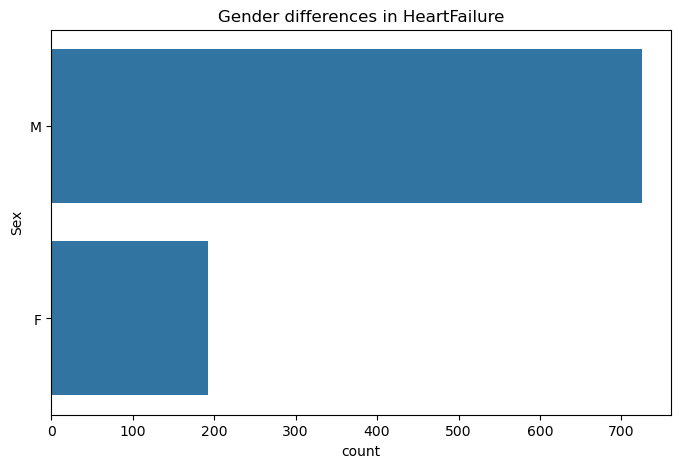

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'])
plt.title('Gender differences in HeartFailure')
plt.show()

Text(0.5, 1.0, 'The number of heart patients to healthy people')

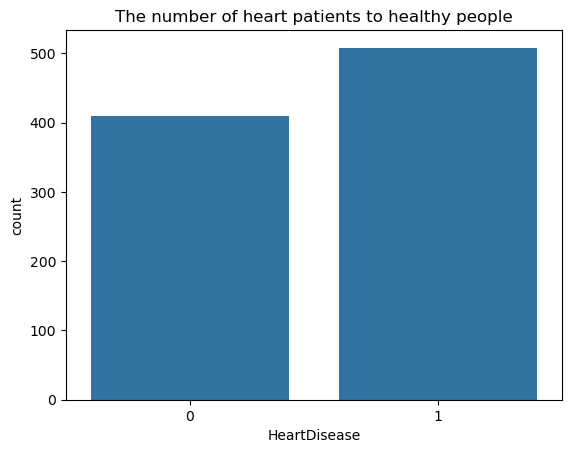

In [24]:
sns.countplot(data=df,x='HeartDisease')
plt.title('The number of heart patients to healthy people')

In [25]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

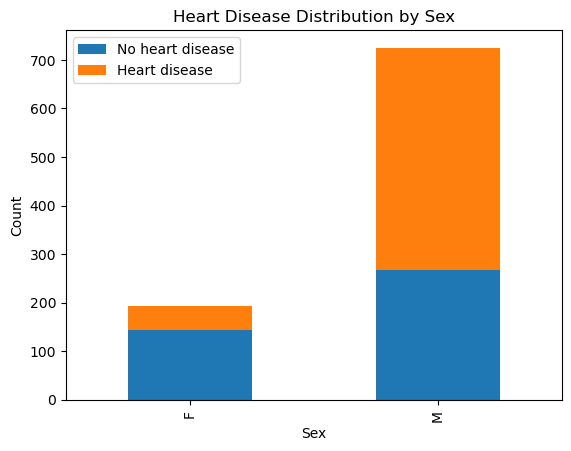

In [26]:
grouped_df = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()

# Rename the columns (0 becomes "No heart disease" and 1 becomes "Heart disease")
grouped_df.columns = ['No heart disease', 'Heart disease']

# If you want to transpose the dataframe so that 'Heart disease' and 'No heart disease' are on the x-axis (fix labels then too!)
#grouped_df = grouped_df.T

# Plot a stacked bar chart
grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Sex')

# Show the plot
plt.show()

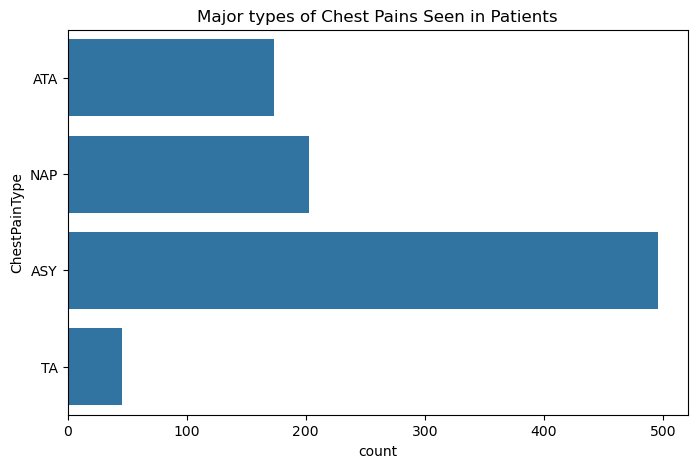

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Patients')
plt.show()

array([<Axes: ylabel='LVH'>, <Axes: ylabel='Normal'>, <Axes: ylabel='ST'>],
      dtype=object)

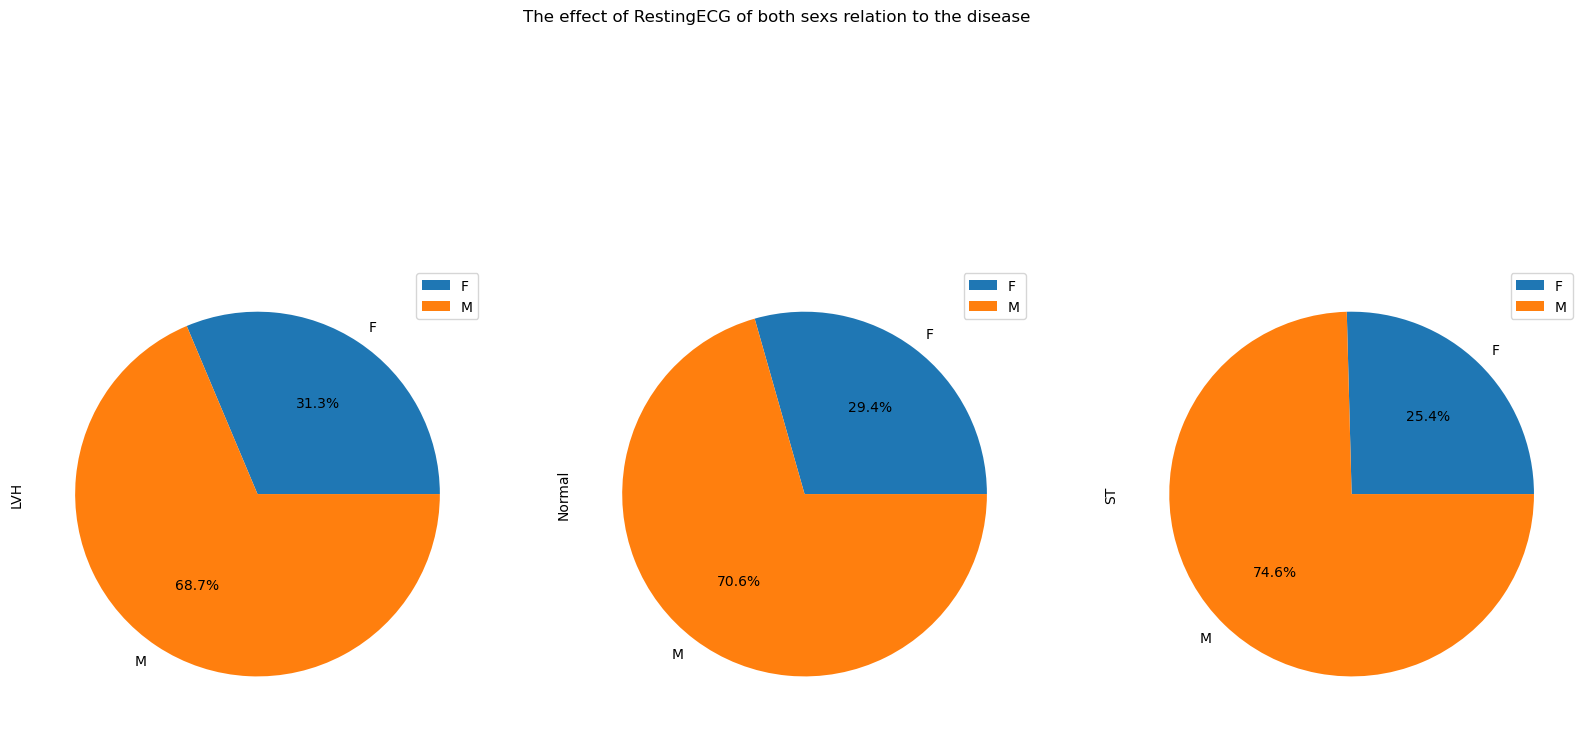

In [28]:
df.pivot_table(index='Sex',columns='RestingECG',
               values='HeartDisease',aggfunc='mean').plot.pie(subplots=True,figsize=(20,10),
                title='The effect of RestingECG of both sexs relation to the disease ',autopct ='%1.1f%%')

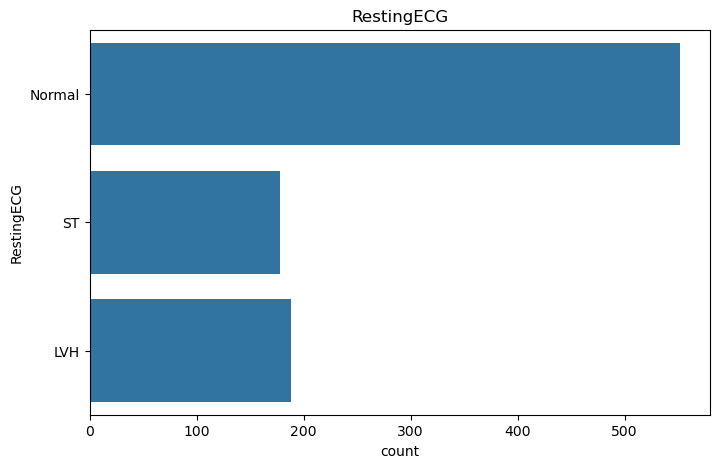

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['RestingECG'])
plt.title('RestingECG')
plt.show()

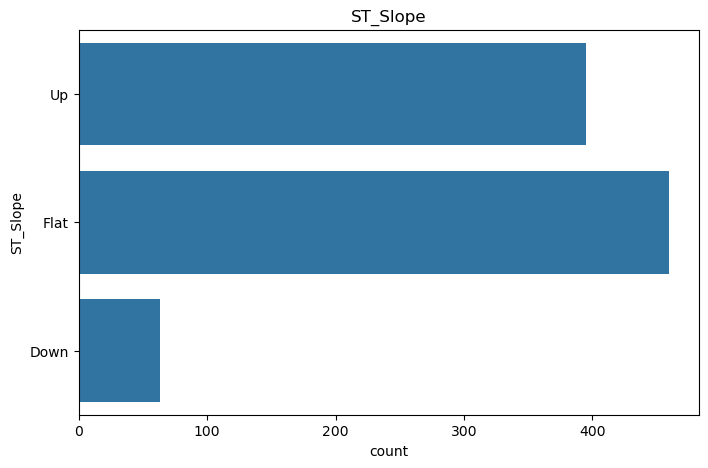

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['ST_Slope'])
plt.title('ST_Slope')
plt.show()

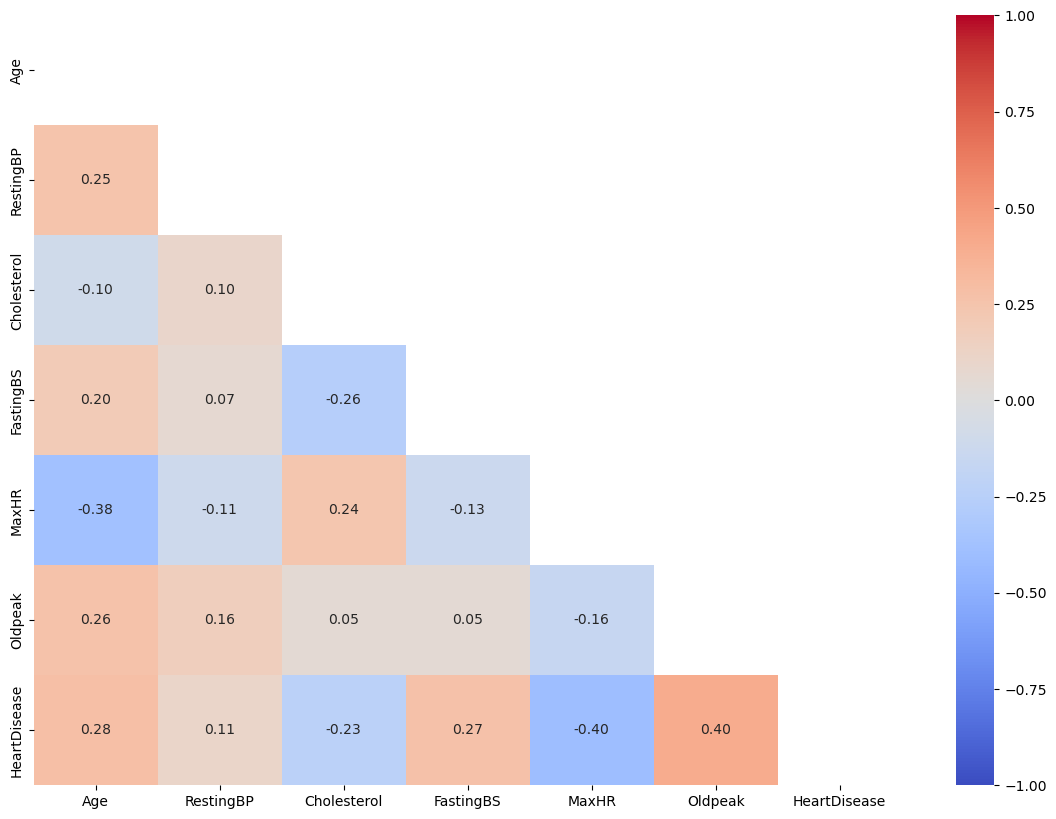

In [31]:
numf= df.select_dtypes('number').columns


matrix = np.triu(df[numf].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df[numf].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [32]:
df.describe(include='O')


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


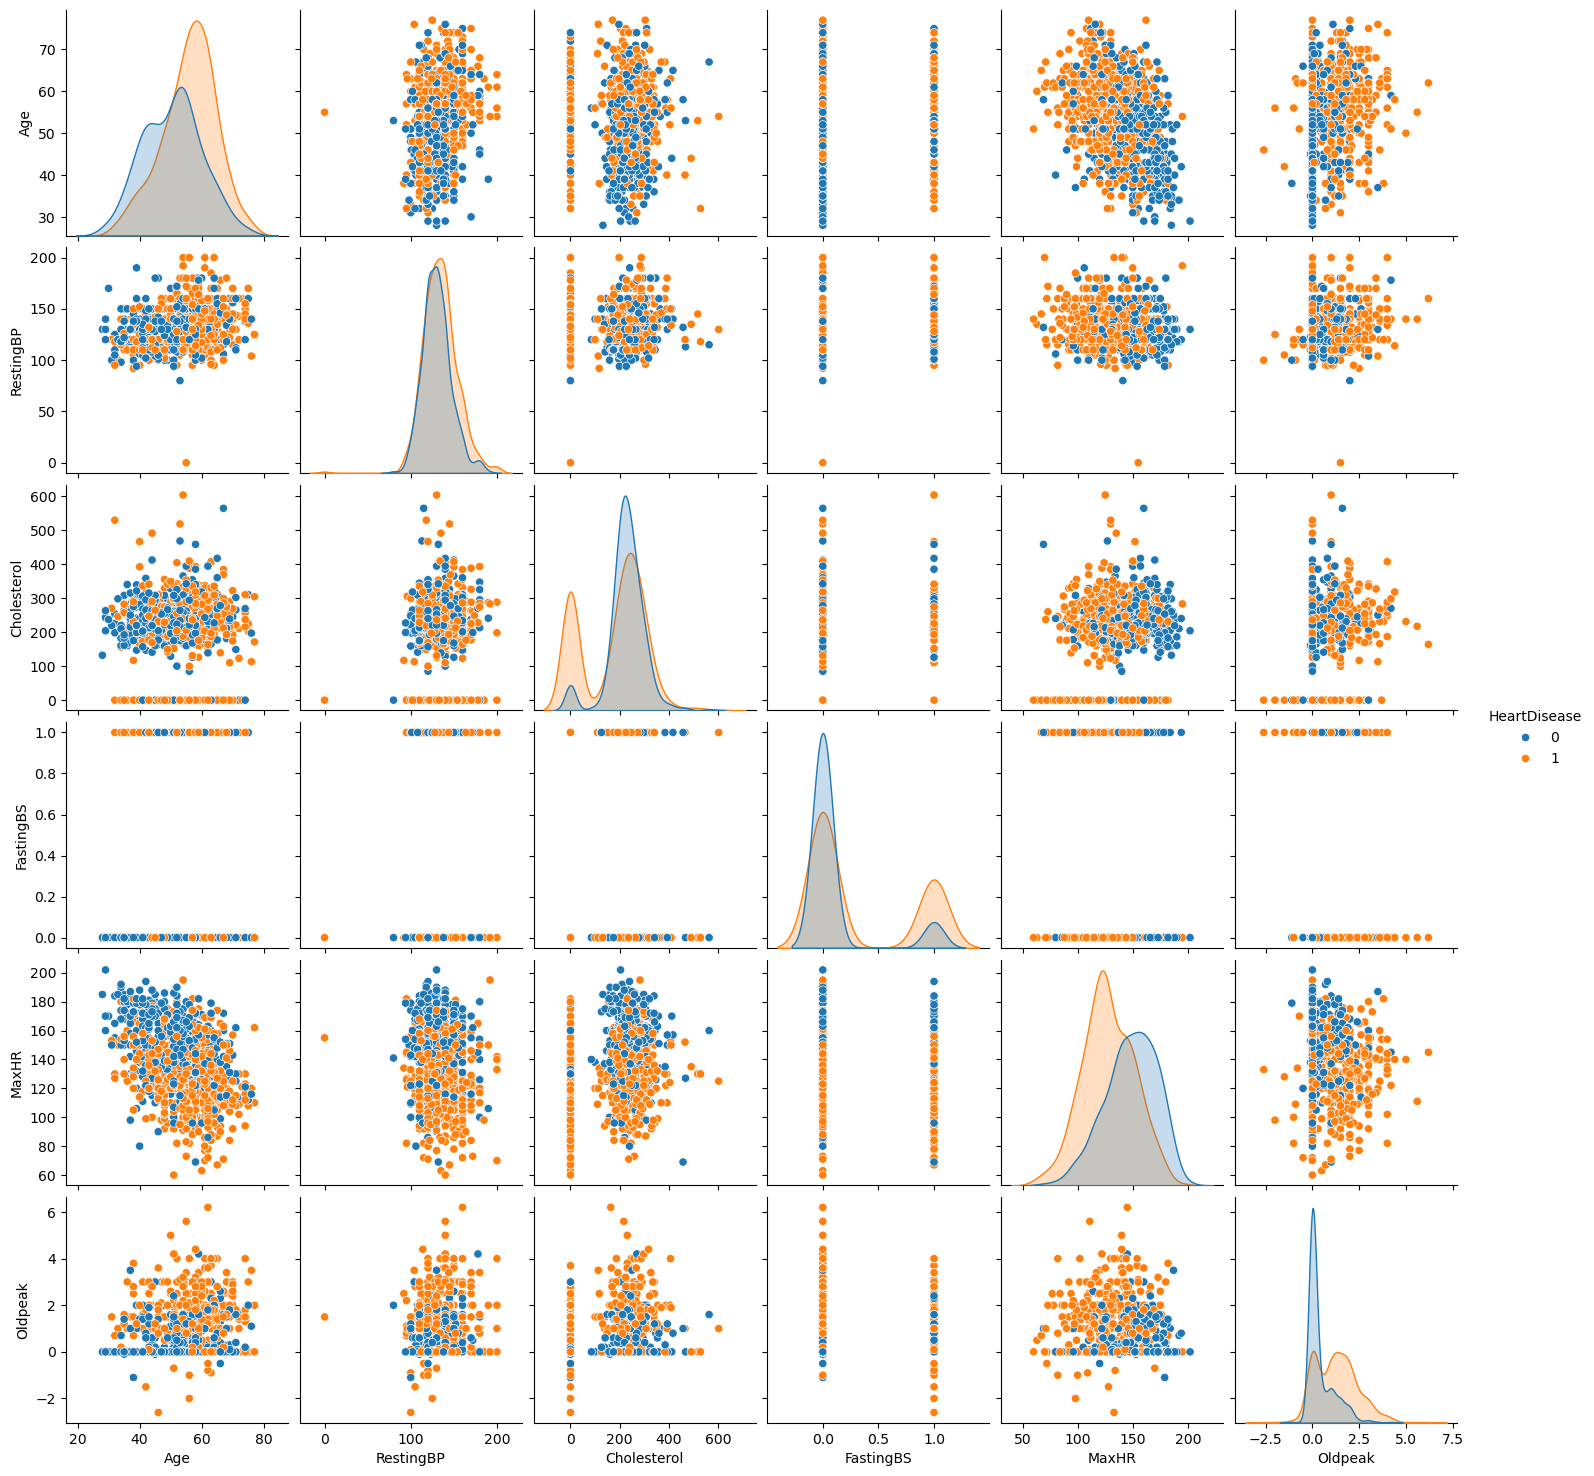

In [33]:
sns.pairplot(data=df,hue='HeartDisease')


Text(0.5, 1.0, 'Distribution of maximum heart rate achieved by HeartDisease')

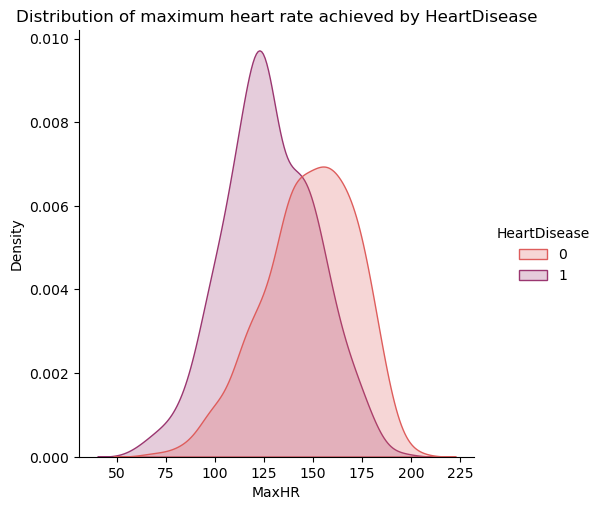

In [34]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',palette='flare',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate achieved by HeartDisease')

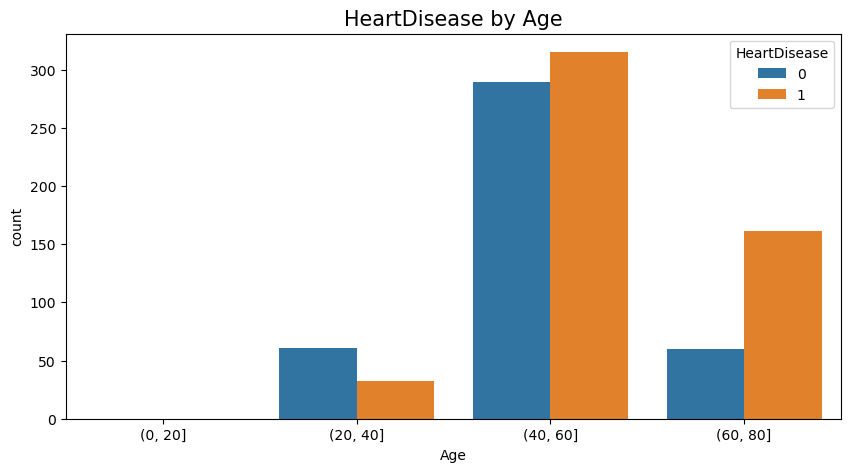

In [35]:
plt.figure(figsize=(10,5))
bins=[0, 20, 40, 60, 80]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.title("HeartDisease by Age", fontsize=15)
plt.show()

In [36]:
colors = ['#9A9483', '#99A799', '#D3E4CD', '#26191B']


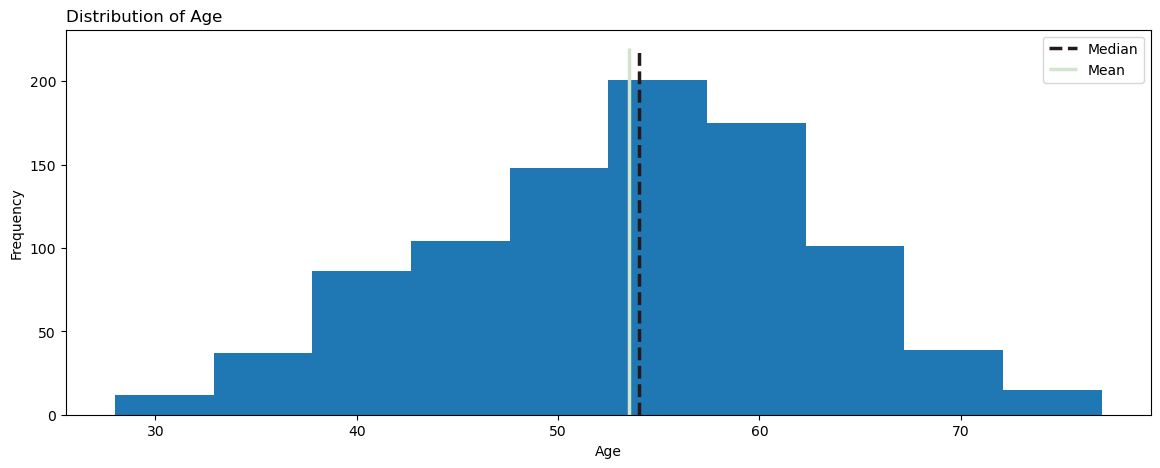

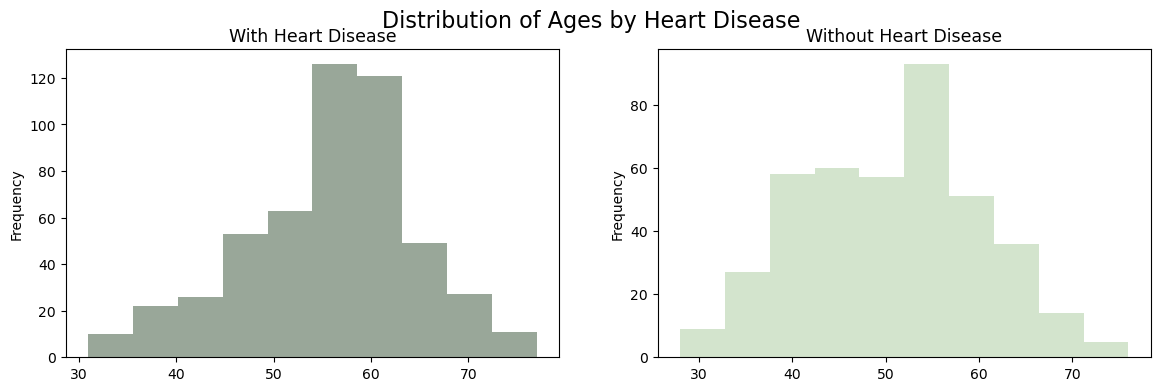

In [37]:
# df preparation for distribution of ages.
ageMed=df.Age.median()
ageMean = df.Age.mean()

# grouped df by target feature 'HeartDisease'
group = df.groupby(by='HeartDisease')
hd_df = group.get_group(1)
nhd_df = group.get_group(0)

# selecting age by heart disease
a = hd_df['Age']
b = nhd_df['Age']

# plot
plt.figure(figsize=(14, 5))
plt.hist(df.Age,  ec=colors[-1])
plt.vlines(ageMed, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(ageMean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

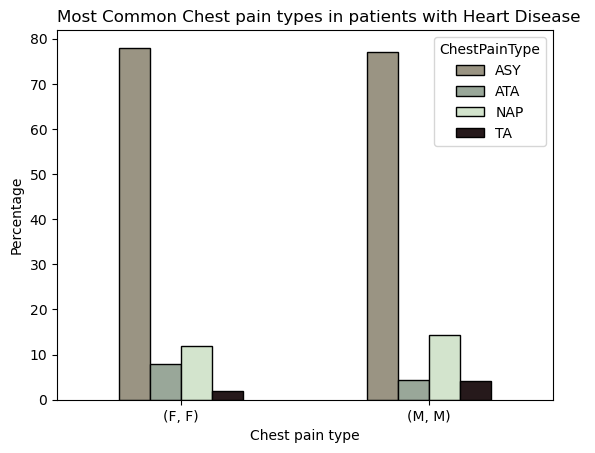

In [38]:
# Most common chest pain in patients with heart disease.
a = hd_df.groupby(['Sex', 'ChestPainType'])['HeartDisease'].count()

# Calculate percentage distribution within each sex group.
a = a.groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Unstack and plot
a.unstack().plot(kind='bar', ec='#000', color=colors)

plt.xlabel('Chest pain type')
plt.ylabel('Percentage')
plt.title("Most Common Chest pain types in patients with Heart Disease ", loc='left')

plt.xticks(rotation=0)
plt.show()


In [39]:
dfm = df.copy()

Encoding  [(what the heck is encoding?)](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

In [40]:
# Using replace
dfm['Sex'].replace({'M':1, 'F':0}, inplace=True)
dfm['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)

# using 'pd.get_dummies()'
cat_cols=dfm.select_dtypes('object')
cat_col_encode = pd.get_dummies(cat_cols)

# drop categorical columns
dfm.drop(columns=cat_cols, axis=1, inplace=True)

# combine new columns with original dfm
dfml = pd.concat([dfm, cat_col_encode], axis=1)

# view first 5 rows
dfml.head()

C:\Users\skyli\AppData\Local\Temp\ipykernel_8368\158497292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm['Sex'].replace({'M':1, 'F':0}, inplace=True)
C:\Users\skyli\AppData\Local\Temp\ipykernel_8368\158497292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfm['Sex'].replace({'M':1, 'F

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


Split Data

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfml.drop('HeartDisease', axis=1)
y = dfml['HeartDisease']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
y_test.shape

(184,)

Building Model

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=100)

In [ ]:
# fit model
LR_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

[What is the convergence warning about?](https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/)

In [ ]:
# predictions
preds = LR_model.predict(x_test)

In [ ]:
x_test

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,63,0,140,195,0,179,0,0.0,False,True,False,False,False,True,False,False,False,True
30,53,1,145,518,0,130,0,0.0,False,False,True,False,False,True,False,False,True,False
377,65,1,160,0,1,122,0,1.2,True,False,False,False,False,False,True,False,True,False
535,56,1,130,0,0,122,1,1.0,True,False,False,False,True,False,False,False,True,False
807,54,1,108,309,0,156,0,0.0,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,50,0,140,288,0,140,1,0.0,False,False,True,False,False,True,False,False,True,False
745,63,0,108,269,0,169,1,1.8,True,False,False,False,False,True,False,False,True,False
584,64,1,141,244,1,116,1,1.5,True,False,False,False,False,False,True,False,True,False
878,49,1,130,266,0,171,0,0.6,False,True,False,False,False,True,False,False,False,True


In [ ]:
y_test

,HeartDisease
668,0
30,1
377,1
535,1
807,0
...,...
211,1
745,1
584,1
878,0


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc = accuracy_score(y_test, preds)
print(acc)

1.0


Evaluation Metrics


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, preds)

array([[67, 10],
       [17, 90]])

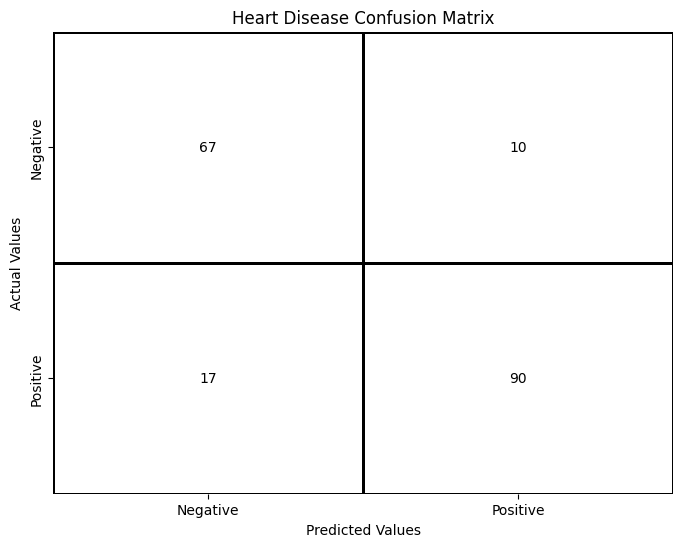

In [ ]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["Negative","Positive"],
                     columns = ["Negative","Positive"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Heart Disease Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

In [ ]:
# fit model
RF_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=101)

In [ ]:
# predictions
preds = RF_clf.predict(x_test)

In [ ]:
# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.8858695652173914


Normalizing the Data

In [ ]:
dfmls = dfml.copy()

In [ ]:
# split data into X and Y
X = dfmls
y = dfmls['HeartDisease']

In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [ ]:
x_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,1,120,240,1,194,0,0.8,False,False,True,False,False,True,False,True,False,False
25,36,1,130,209,0,178,0,0.0,False,False,True,False,False,True,False,False,False,True
84,56,1,150,213,1,125,1,1.0,True,False,False,False,False,True,False,False,True,False
10,37,0,130,211,0,142,0,0.0,False,False,True,False,False,True,False,False,False,True
344,51,1,120,0,1,104,0,0.0,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,120,254,0,110,0,0.0,True,False,False,False,False,False,True,False,False,True
270,45,1,120,225,0,140,0,0.0,True,False,False,False,False,True,False,False,False,True
860,60,1,130,253,0,144,1,1.4,True,False,False,False,False,True,False,False,False,True
435,60,1,152,0,0,118,1,0.0,True,False,False,False,False,False,True,False,False,True


In [ ]:
x_train_scaled

array([[0.27083333, 1.        , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.14583333, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       [0.5625    , 1.        , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64583333, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       [0.64583333, 1.        , 0.76      , ..., 0.        , 0.        ,
        1.        ],
       [0.22916667, 0.        , 0.75      , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# LogisticRegression model
LR_model = LogisticRegression(random_state=42)

# fit model
LR_model.fit(x_train_scaled, y_train)

# predictions
preds = LR_model.predict(x_test_scaled)

#accuracy
acc = accuracy_score(y_test, preds)
print(acc)

ValueError: Found input variables with inconsistent numbers of samples: [734, 642]

In [ ]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=4)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.8804347826086957
